#**FINAL PROJECT TRAINING ALGORITMA MACHINE LEARNING**

Assalamualaikum Wr. Wb.
Alhamdulillahirrabbil 'Alamiin. InsyaAllah disini saya akan membuat Eksperimen Metode KNN dengan berbagai jarak, diantarannya : Manhattan, Minkowski, Chebisev, Bray-Curtiz, dan Canberra) dengan output sebagai berikut.

1. Akurasi
2. Presisi
3. Recall
4. f1-score
5. Waktu komputasi



# **KNN With Various Distance Functions**

## **Algoritma K-Nearest Neighbor (KNN)**

Algoritma K-Nearest Neighbor (KNN) adalah algoritma Machine Learning yang melakukan klasifikasi sebuah data didasarkan pada sifat-sifat data didekatnya. Sebuah ungkapan yang bisa membantu dengan mudah memahami ide dasar algoritma ini adalah: "Jika kamu ingin mengetahui sifat seseorang, lihatnya sifat-sifat orang terdekatnya. Sifatnya tidak akan jauh berbeda dari mereka."

Gambar di bawah ini dapat meilustrasikan hal di atas dengan jelas

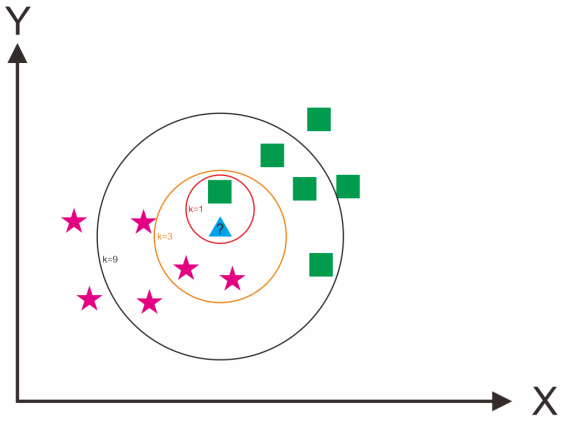


Data baru yang dilmbangkan dengan simbol segitiga biru dapat diklasifikasikan sebagai kelompok kotak hijau atau bintang merah jambu. Jika dilihat berdasarkan kriteria jumlah k=1 maka data segitiga biru diklasifikasikan ke dalam kelompok kotak hijau. Sedangkan jika dilihat berdasarkan kriteria jumlah k=3 maka data tersebut maka diklasifikasikan sebagai kelompok bintang merah jambu. Hal yang sama juga dapat diterapkan untuk k=9. Sebenarnya, kita telah melakukan klasifikasi berdasarkan jarak. Kedekatan yang dimaksud ketika k=1, k=3, dan k=9, kita selalu mengukur kedekatan antara data baru(segitiga biru) dengan data-data berlabel kelompok sebelumnya. Berdasarkan ide dasar di atas, maka diturunkanlah dalam sebuah algoritma untuk menentukan kelompok data dari sebuah inputan data baru(segitiga biru).

**Contoh Perhitungan K-Nearest Neighbor**

Diketahui data $x_1$ dan $x_2$ adalah sebagai berikut:

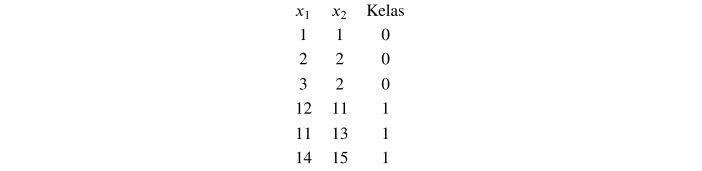

Kita diminta menentukan kelas dari data baru yaitu (9,10) dengan parameter k=3

**Langkah 1:**
Menentukan parameter k (jumlah tetangga paling dekat)

k=3

**Langkah 2:**
Menghitung jarak eucliden objek terhadap data training yang diberikan.

Formula jarak Euclidean:

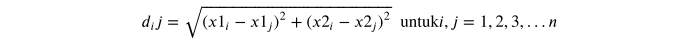


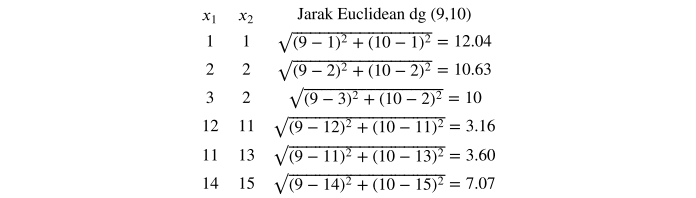

**Langkah 3:**
Mengurutkan hasil langkah 2 secara ascending (berurutan dari nilai tinggi ke rendah)

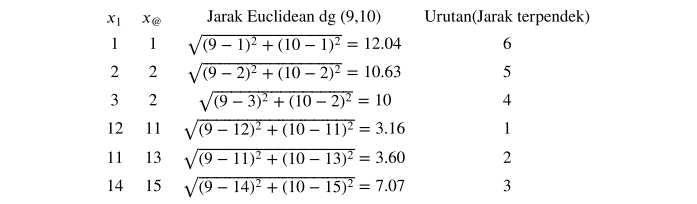

**Langkah 4:**
Mengumpulkan kategori data (Klasifikasi nearest neighbor berdasarkan nilai k)

Kelas data 3 data terdekat (k=3)

(12,11)=1, (11,13)=1, (14,15)=1

**Langkah 5:**
Dengan menggunakan kategori neasrest neighbor yang paling mayoritas maka dapat diprediksikan ketegorinya objek.

Kelas data untuk k=3

'0'=0, '1'=3

Maka disimpulkan bahwa data (9,10) diklasifikasikan ke kelas '1'

### **Import Library**

Import Library yang dibutuhkan

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import datasets                                 # Library for sample dataset
from sklearn.model_selection import train_test_split         # Library for spliting data into training & testing
from collections import Counter                              # Library for find most common elemen in the series
import numpy as np                                           # library for numerical in python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## **Input Dataset**

In [ ]:
data = pd.read_csv('/content/Titanic.csv')
data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


*Dataset diatas adalah data penumpang kapal titanic dengan label penumpang yang selamat dan tidak selamat berdasarkan nomor prnumpang* 

In [ ]:
#ukuran dataset
data.shape

(418, 2)

*dataset memiliki 418 baris dan 2 kolom*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
data.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


Membagi data menjadi variable X and y

In [ ]:
#Mendefinisikan data X sebagai dfx
dfx = data.PassengerId

In [ ]:
#merubah data dfx menjadi array didefinisikan sebagai X
X = dfx.to_numpy()

In [ ]:
#Mendefinisikan data y sebagai dfy
dfy = data.Survived

In [ ]:
#merubah data dfx menjadi array didefinisikan sebagai y
y = dfy.to_numpy()

In [ ]:
X, y

(array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
         903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
         914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
         925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
         936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
         947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
         958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
         969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
         980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
         991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
        1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 1037, 1038, 1039, 

## **Data Preprocessing**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import time

In [ ]:
# Membagi  menjadi data training (80%) dan data testing (20%)
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.20, random_state=1234)

In [ ]:
X_latih

array([1092, 1279, 1146, 1078, 1175, 1137, 1155, 1285, 1170, 1277, 1032,
       1010, 1154,  947, 1113, 1237, 1065, 1241,  925, 1158, 1302, 1239,
       1073,  982,  946, 1086, 1030,  928, 1283, 1007, 1095, 1048, 1099,
       1085, 1216, 1079, 1147, 1297, 1227,  929,  959,  892, 1058, 1015,
       1255, 1192, 1002, 1284, 1144, 1110, 1177, 1300, 1205, 1080, 1059,
       1215,  934, 1286, 1224, 1281, 1226,  912, 1238,  944, 1116, 1036,
       1038, 1026, 1305, 1024,  898, 1250, 1206,  915, 1248, 1303, 1199,
       1306, 1276, 1017,  987,  923, 1180,  972, 1258,  901, 1049, 1209,
        985, 1211,  969, 1261, 1229, 1210,  909, 1259, 1001, 1214,  961,
       1188, 1212, 1157,  994, 1119, 1181, 1291, 1076, 1084,  964, 1016,
        897, 1190,  955, 1118, 1108, 1191, 1189, 1019, 1120, 1293, 1091,
       1121, 1243,  943, 1070, 1105, 1029, 1004,  975, 1122, 1077, 1055,
        986,  950, 1219,  940, 1163, 1033, 1213,  924, 1083, 1081, 1232,
       1101, 1271,  998,  952, 1111, 1225, 1098,  9

In [ ]:
X_uji

array([ 991, 1106, 1247,  992,  993, 1265, 1145, 1165,  970,  936, 1292,
       1094,  956, 1097,  899, 1112, 1061, 1140,  996, 1115, 1156,  903,
        914,  921, 1221,  966,  917,  949,  951, 1207,  963, 1126, 1090,
       1014, 1233, 1054, 1000, 1282, 1152, 1245, 1045, 1131, 1240, 1257,
       1072, 1060, 1270, 1107,  958,  984, 1295, 1025,  983, 1193, 1173,
       1052, 1246, 1117, 1288,  913,  989,  932,  905,  935, 1021, 1003,
       1251, 1023, 1242, 1298, 1071, 1068, 1114, 1041,  965,  916, 1230,
       1290, 1162, 1304, 1231,  962, 1256, 1139])

In [ ]:
y_latih

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [ ]:
y_uji

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

## **Build Function**

### **Distance Function**

In [ ]:
import scipy.spatial.distance as dst

In [ ]:
# Euclidean Distance
dst.euclidean([0,0], [1,1])

1.4142135623730951

In [ ]:
# Manhattan/Cityblock Distance
dst.cityblock([0,0], [1,1])

2

In [ ]:
# Minkowski Distance
dst.minkowski([0,0], [1,1])

1.4142135623730951

In [ ]:
# Chebisev Distance
dst.chebyshev([0,0], [1,1])

1

In [ ]:
# Bray Curtis Distance
dst.braycurtis([0,0], [1,1])

1.0

In [ ]:
# Canberra Distance
dst.canberra([0,0], [1,1])

2.0

### **KNN Function**

In [ ]:
def _knn_euclidean(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.euclidean(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_euclidean(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_euclidean(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_cityblock(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.cityblock(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_cityblock(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_cityblock(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_minkowski(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.minkowski(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_minkowski(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_minkowski(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_chebyshev(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.chebyshev(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_chebyshev(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_chebyshev(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_braycurtis(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.braycurtis(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_braycurtis(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_braycurtis(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
def _knn_canberra(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.canberra(x, x_latih) for x_latih in X_latih]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_latih[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_canberra(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_canberra(x_i) for x_i in x_baru]
    return np.array(y_pred)

### **Evaluation Function**

In [ ]:
#import library
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### **Plot Function**

In [ ]:
def bar_plot(df, evalf):

    # Memilih tema plot
    sns.set_theme(style="whitegrid")

    # Membuat sebuah figure dan sebuah axes
    fig, ax=plt.subplots(figsize=(10,8)) # figsize=(x,y) untuk menentukan ukuran gambar

    # Melakukan bar plot
    ax = sns.barplot(data=df,               # Nama DataFrame
                     y=evalf,               # Data sumbu Y
                     x=df.index             # Data sumbu X

                    )
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    # Mengatur sudut rotasi label stepsize sumbu x
    plt.xticks(rotation=80)

    # Mengganti label sumbu x
    ax.set_xlabel('distance')

    # Mengganti label sumbu y
    ax.set_ylabel('{} score'.format(evalf))

    # Mengatur Judul Gambar
    ax.set_title('Evaluation Score of KNN with Various Distance', fontsize=16, fontweight='bold')

    # Menampilkan Gambar
    plt.show()

## **Experimentations**

In [ ]:
# Parameter
k=4

In [ ]:
# KNN Euclidean Distance
start = time.time()
y_pred=KNN_euclidean(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
euclidean =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
euclidean 

[0.5, 0.48180636777128005, 0.5, 0.48660986001217293, 0.49818897247314453]

In [ ]:
# KNN Manhattan/City Block Distance
start = time.time()
y_pred=KNN_cityblock(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
manhattan =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
manhattan 

[0.5, 0.48180636777128005, 0.5, 0.48660986001217293, 0.3531925678253174]

In [ ]:
# KNN Minkowski Distance
start = time.time()
y_pred=KNN_minkowski(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
minkowski =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
minkowski

[0.5, 0.48180636777128005, 0.5, 0.48660986001217293, 0.4732346534729004]

In [ ]:
# KNN Chebyshev Distance
start = time.time()
y_pred=KNN_chebyshev(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
chebyshev =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
chebyshev

[0.5, 0.48180636777128005, 0.5, 0.48660986001217293, 0.29323339462280273]

In [ ]:
# KNN Bray Curtis Distance
start = time.time()
y_pred=KNN_braycurtis(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
braycurtis =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
braycurtis

[0.44047619047619047,
 0.4139036251105217,
 0.44047619047619047,
 0.42273121903886424,
 0.5100572109222412]

In [ ]:
# KNN Canberra Distance
start = time.time()
y_pred=KNN_canberra(X_latih, y_latih, k, X_uji)
finish = time.time()
time_comp = finish-start
# Evaluation
canberra =[accuracy_score(y_uji, y_pred),
           precision_score(y_uji, y_pred, average='weighted'),
           recall_score(y_uji, y_pred, average='weighted'),
           f1_score(y_uji, y_pred, average='weighted'),
           time_comp]
canberra

[0.44047619047619047,
 0.4139036251105217,
 0.44047619047619047,
 0.42273121903886424,
 1.0086040496826172]

### **Evaluation**

In [ ]:
df = pd.DataFrame([euclidean,
                  manhattan,
                  minkowski,
                  chebyshev,
                  braycurtis,
                  canberra], 
                  columns = ['accuracy','precision', 'recall', 'f1', 'time'],
                 index = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'braycurtis', 'canberra'])
df

,accuracy,precision,recall,f1,time
euclidean,0.500000,0.481806,0.500000,0.486610,0.498189
manhattan,0.500000,0.481806,0.500000,0.486610,0.353193
minkowski,0.500000,0.481806,0.500000,0.486610,0.473235
chebyshev,0.500000,0.481806,0.500000,0.486610,0.293233
braycurtis,0.440476,0.413904,0.440476,0.422731,0.510057
canberra,0.440476,0.413904,0.440476,0.422731,1.008604


### **Visualization**

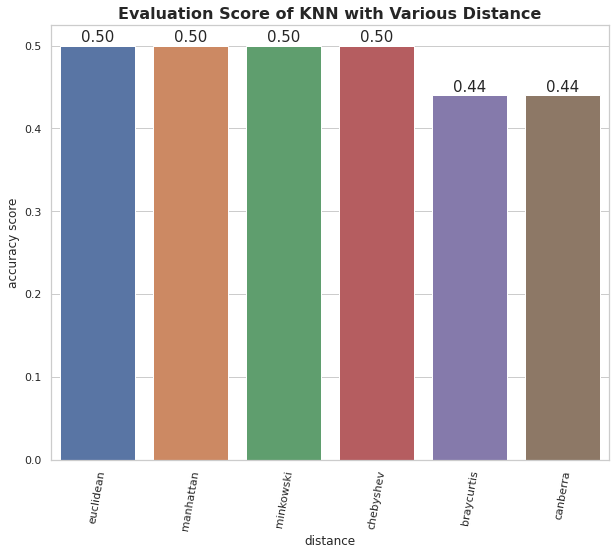

In [ ]:
bar_plot(df, 'accuracy')

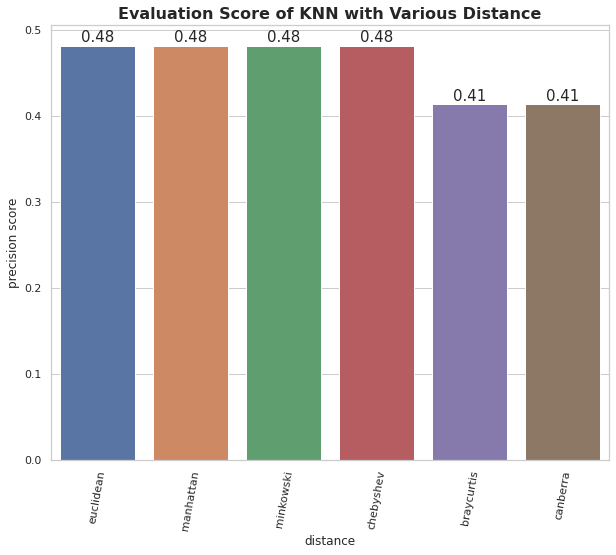

In [ ]:
bar_plot(df, 'precision')

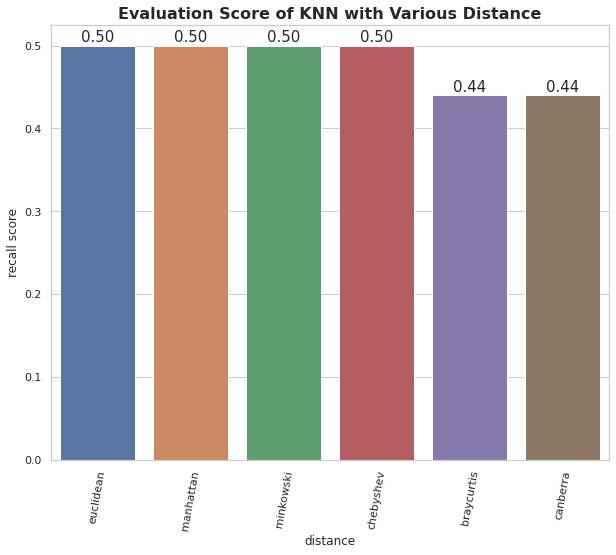

In [ ]:
bar_plot(df, 'recall')

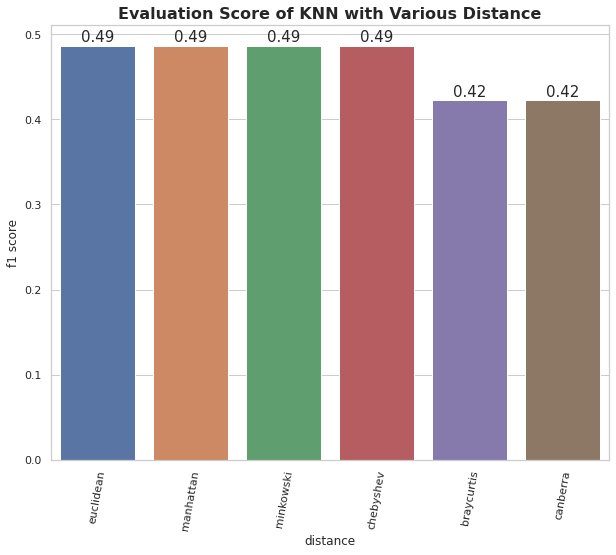

In [ ]:
bar_plot(df, 'f1')

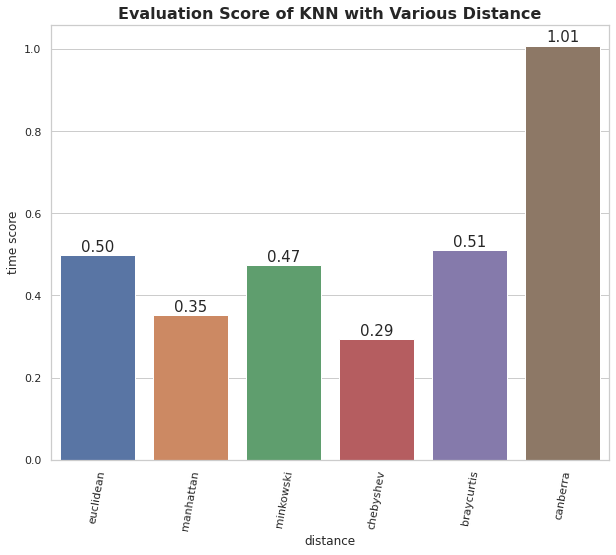

In [ ]:
bar_plot(df, 'time')


## **kesimpulan**

Dari visualisasi yang dilakukan diatas dengan menggunakan data 'Titanic' dapat diambil kesimpulan bahwa :

Acurracy, precision, recall, f1, time lebih baik menggunakan jarak euclidean, manhattan, minkowski dan chebisev daripada menggunakan jarak braycurties dan canberra.